<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br><br><br>

# Listed Volatility and Variance Derivatives

**Dr. Yves J. Hilpisch &mdash; Wiley Finance (2016)**

<img src="http://hilpisch.com/images/lvvd_cover.png" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

# Model-Free Replication of Variance

## Introduction

## Spanning with Options

## Log Contracts

## Static Replication of Realized Variance and Variance Swaps

## Constant Dollar Gamma Derivatives and Portfolios

## Practical Replication of Realized Variance

In [1]:
import math
import numpy as np
import scipy.stats as scs
def dollar_gamma(St, K, t, T, r, sigma):
    ''' Returns European call option dollar gamma. '''
    d1 = ((np.log(St / K) + (r + 0.5 * sigma ** 2) * (T - t))
              / sigma * math.sqrt(T - t))
    gamma = scs.norm.pdf(d1) / (St * sigma * math.sqrt(T - t))
    return gamma * St ** 2

In [2]:
t = 0.0  # curent date in year fractions
T = 1.0  # maturity in year fractions
r = 0.01  # constant risk-less short rate
sigma = 0.2  # instantenous volatility

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
%matplotlib inline
gammas = pd.DataFrame()
## 300 data points over the range form 0 to 300
s_range = np.linspace(0.0001, 300, 300)
strike_range = range(25, 226, 25)
for K in strike_range:
    gammas['K=%d' % K] = dollar_gamma(s_range, K, t, T, r, sigma)

In [4]:
gammas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
K=25     300 non-null float64
K=50     300 non-null float64
K=75     300 non-null float64
K=100    300 non-null float64
K=125    300 non-null float64
K=150    300 non-null float64
K=175    300 non-null float64
K=200    300 non-null float64
K=225    300 non-null float64
dtypes: float64(9)
memory usage: 21.2 KB


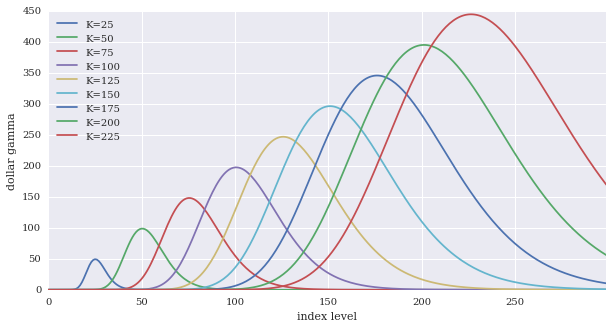

In [5]:
gammas.plot(figsize=(10, 5));
plt.xlabel('index level');
plt.ylabel('dollar gamma');

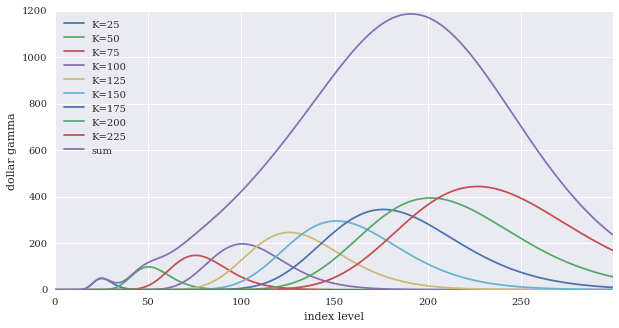

In [6]:
gammas['sum'] = gammas.sum(axis=1)
gammas.plot(figsize=(10, 5));
plt.xlabel('index level');
plt.ylabel('dollar gamma');

In [7]:
gammas_k = pd.DataFrame()
for K in strike_range:
    gammas_k['K=%d' % K] = dollar_gamma(s_range, K, t, T, r, sigma) / K
gammas_k['sum'] = gammas_k.sum(axis=1)

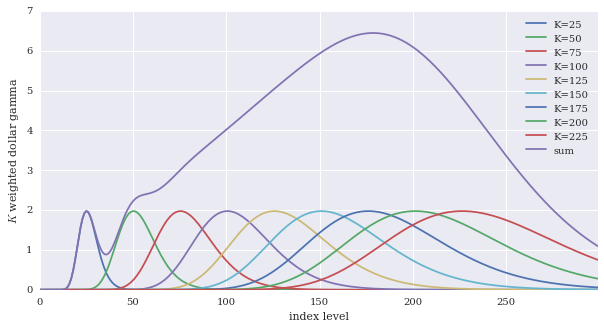

In [8]:
gammas_k.plot(figsize=(10, 5));
plt.xlabel('index level');
plt.ylabel('$K$ weighted dollar gamma');

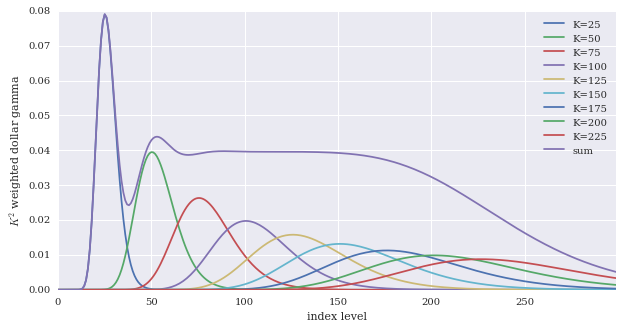

In [9]:
gammas_k2 = pd.DataFrame()
for K in strike_range:
    gammas_k2['K=%d' % K] = dollar_gamma(s_range, K, t, T, r, sigma) / K ** 2
gammas_k2['sum'] = gammas_k2.sum(axis=1)

gammas_k2.plot(figsize=(10, 5));
plt.xlabel('index level');
plt.ylabel('$K^2$ weighted dollar gamma');

In [10]:
## more dense strike range
strike_range = range(10, 350, 5)
gammas_k2 = pd.DataFrame()
for K in strike_range:
    gammas_k2['K=%d' % K] = dollar_gamma(s_range, K, t, T, r, sigma) / K ** 2
gammas_k2['sum'] = gammas_k2.sum(axis=1)

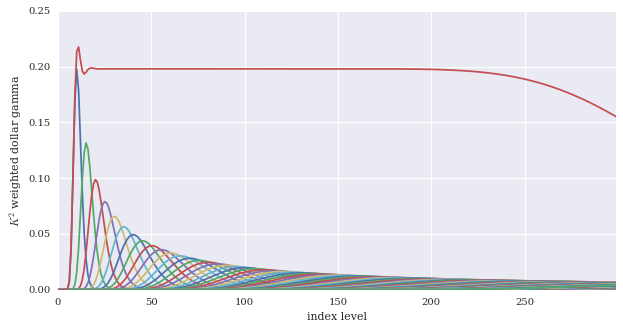

In [11]:
# @savefig gamma-5.pdf
gammas_k2.plot(figsize=(10, 5), legend=False);
plt.xlabel('index level');
plt.ylabel('$K^2$ weighted dollar gamma');

## VSTOXX as Volatility Index

## Conclusions

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**DX Analytics** |
<a href="http://dx-analytics.com">http://dx-analytics.com</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance Books** |
<a href="http://books.tpq.io" target="_blank">http://books.tpq.io</a>

**Python for Finance Training** |
<a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>